### Libraries

In [3]:
##importing the libraries
import pandas as pd # data processing, CSV file 
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting the data
import seaborn as sns # plotting the data
import math # calculation
import sys
#!{sys.executable} -m pip install scipy
from scipy import stats
from scipy.stats import zscore
import datetime

### Dataset

In [14]:
#load the dataset
df = pd.read_csv("C:\\Users\\user\\Desktop\\ML_Coursework")
df.shape

(4424, 37)

In [15]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [16]:
#check  missing values
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

### Visualization

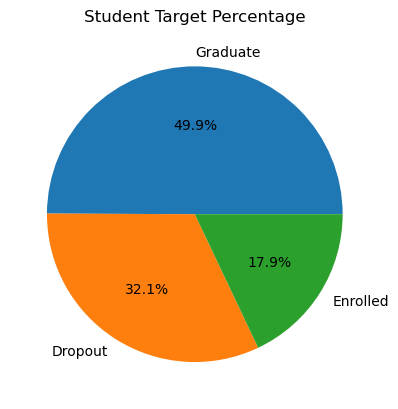

In [18]:

## plot Student Target Percentage
students= df['Target'].value_counts()

plt.pie(students, labels=students.index, autopct='%1.1f%%')
plt.title('Student Target Percentage')
plt.show()

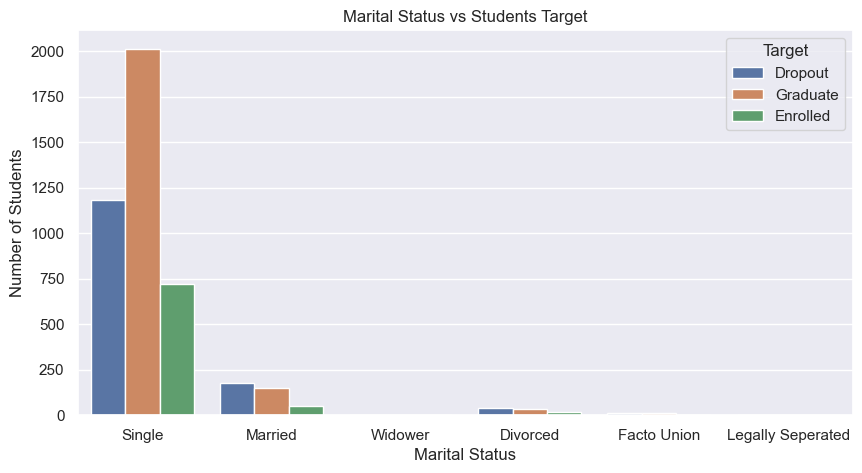

In [20]:
##plot Marital Status vs Students Target
plt.figure(figsize=(10,5))

sns.set(style="darkgrid")
sns.countplot(data=df, x='Marital status',
              hue='Target')

plt.xticks(ticks=[0,1,2,3,4,5], 
           labels=['Single','Married','Widower',
                   'Divorced','Facto Union',
                   'Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.title("Marital Status vs Students Target")
plt.show()

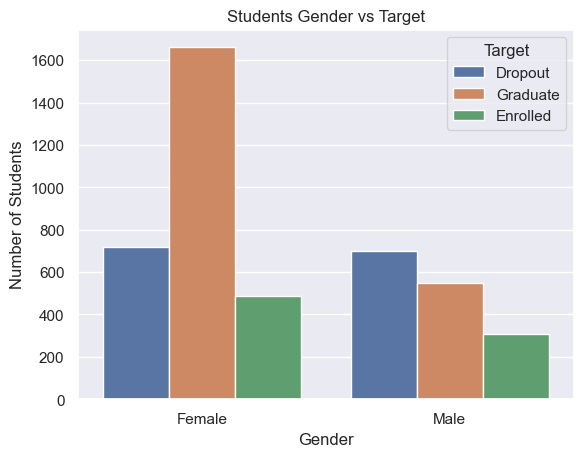

In [21]:
##plot Students Gender vs Target
sns.set(style="darkgrid")
sns.countplot(data=df, x='Gender',
              hue='Target')
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.title("Students Gender vs Target")
plt.show()

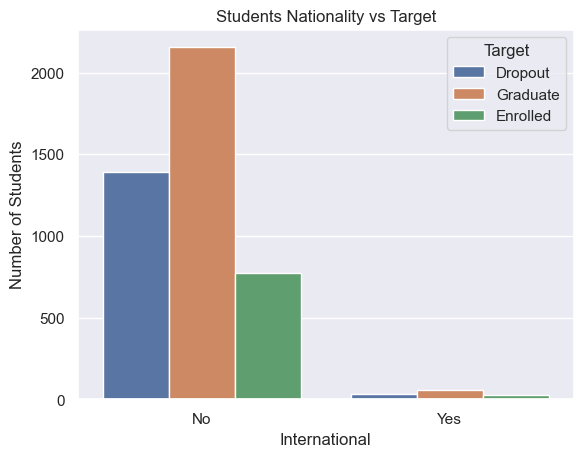

In [22]:
##plot Students Nationality vs Target
sns.countplot(data=df, x='International',
              hue='Target')

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.title("Students Nationality vs Target")
plt.show()

Text(0.5, 1.0, 'Enrollment Age Distribution')

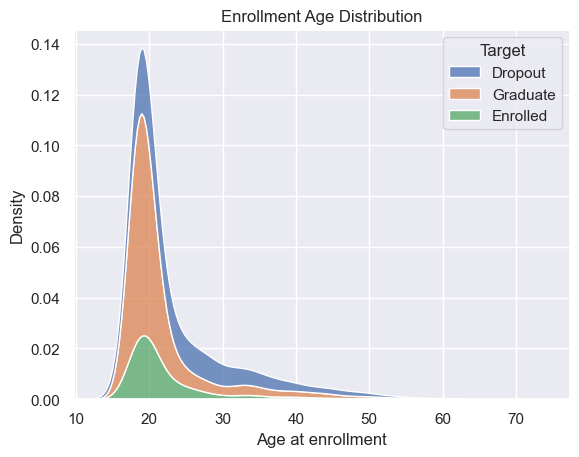

In [23]:
##Plot Enrollment Age Distribution density
sns.kdeplot(data=df,
            x="Age at enrollment",
            hue="Target",
            multiple="stack")
plt.title("Enrollment Age Distribution")

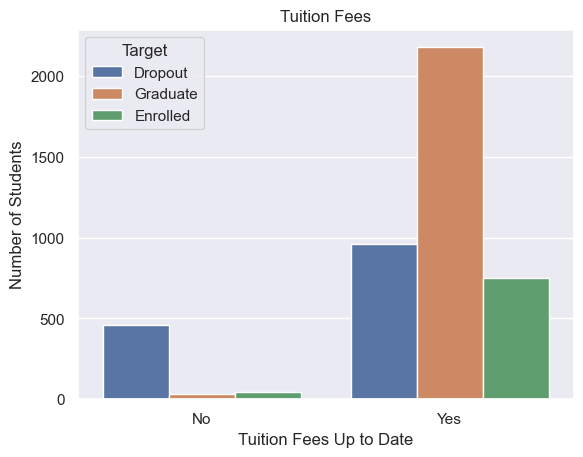

In [24]:
##plotTuition Fees
sns.countplot(data=df, 
              x="Tuition fees up to date", 
              hue='Target')

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Number of Students')
plt.title("Tuition Fees")
plt.show()

### Feature Selection

In [26]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [27]:
df2 = df.copy()


In [28]:
#create feature and target 
X = df2.drop("Target", 1)       # feature matrix
Y = df2['Target']  #target column
#final cleaning: replace all infinite values with nan then drop all nan values
X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_8620\3452719028.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df2.drop("Target", 1)       # feature matrix


In [29]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
#Creating the random forest algorithm
rf = RandomForestClassifier(n_estimators = 10, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=10,
                       random_state=42)

In [32]:
#check important features
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


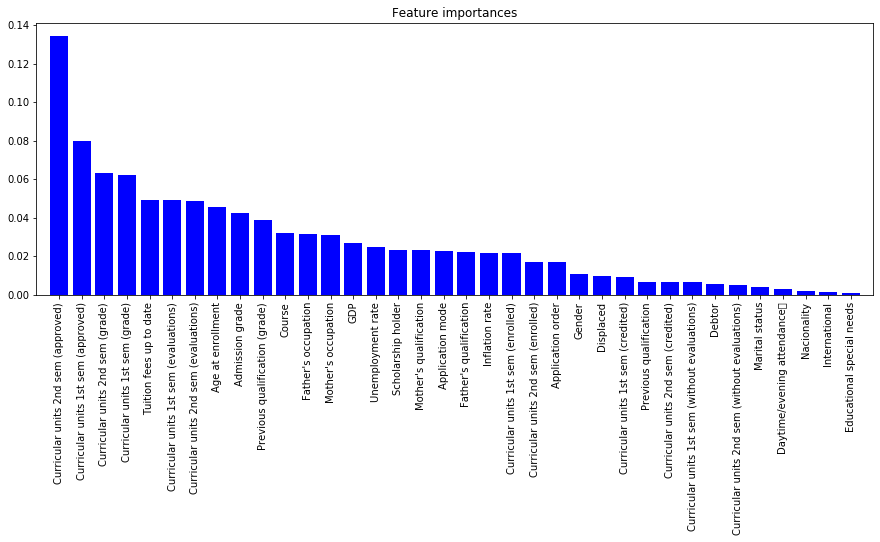

In [164]:
#plot most important features
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="blue", align="center")
plt.xticks(range(X_train.shape[1]), df2.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [165]:
#select the best identified features for the algorithms
modeldata = df2[['Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)',
                 'Curricular units 2nd sem (grade)','Curricular units 1st sem (grade)',
                 'Tuition fees up to date','Curricular units 1st sem (evaluations)',
                 'Curricular units 2nd sem (evaluations)','Age at enrollment','Admission grade','Target']]
modeldata = modeldata.dropna()
modeldata.head(5)

,Curricular units 2nd sem (approved),Curricular units 1st sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (grade),Tuition fees up to date,Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),Age at enrollment,Admission grade,Target
0,0,0,0.000000,0.000000,1,0,0,20,127.3,Dropout
1,6,6,13.666667,14.000000,0,6,6,19,142.5,Graduate
2,0,0,0.000000,0.000000,0,0,0,19,124.8,Dropout
3,5,6,12.400000,13.428571,1,8,10,20,119.6,Graduate
4,6,5,13.000000,12.333333,1,9,6,45,141.5,Graduate


# Classification Models

#### Split Data

In [167]:
##collect the data input variables
X=modeldata[['Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)',
                 'Curricular units 2nd sem (grade)','Curricular units 1st sem (grade)',
                 'Tuition fees up to date','Curricular units 1st sem (evaluations)',
                 'Curricular units 2nd sem (evaluations)','Age at enrollment','Admission grade']]  # Features
y=modeldata['Target']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test

### Random Forest Classifier

In [168]:
#Create a random forest Classifier
randomforest=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets
randomforest.fit(X_train,y_train)

y_pred=randomforest.predict(X_test)

In [169]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Model Accuracy
print("Random forest Accuracy:",metrics.accuracy_score(y_test, y_pred))


Random forest Accuracy: 0.7043399638336347


In [170]:
#other performance metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Dropout       0.74      0.75      0.74       364
    Enrolled       0.42      0.27      0.33       211
    Graduate       0.75      0.85      0.79       531

    accuracy                           0.70      1106
   macro avg       0.64      0.62      0.62      1106
weighted avg       0.68      0.70      0.69      1106



In [171]:
##create a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix


array([[272,  31,  61],
       [ 62,  58,  91],
       [ 34,  48, 449]], dtype=int64)

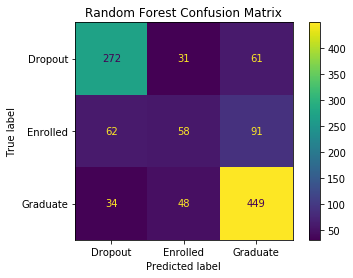

In [172]:
##plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ["Dropout", "Enrolled","Graduate"])

cm_display.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

### Support Vector Machine

In [173]:

# import SVC classifier
from sklearn.svm import SVC


# create the svc classifier with sigmoid kernel
svc =SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)



In [174]:

# compute and print accuracy score
print('SVC Model accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

SVC Model accuracy: 0.4241


In [175]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Dropout       0.34      0.38      0.35       364
    Enrolled       0.00      0.00      0.00       211
    Graduate       0.48      0.63      0.54       531

    accuracy                           0.42      1106
   macro avg       0.27      0.33      0.30      1106
weighted avg       0.34      0.42      0.38      1106



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


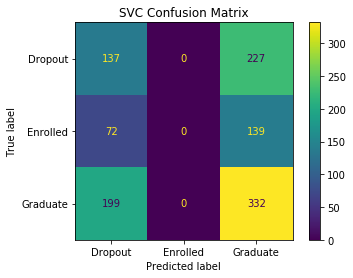

In [177]:

##create a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix
##plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ["Dropout", "Enrolled","Graduate"])

cm_display.plot()
plt.title("SVC Confusion Matrix")
plt.show()

### K-Nearest Neighbor 

In [178]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# create KNN the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [179]:
##prediction
y_pred = knn.predict(X_test)

#KNN model accuracy
print('KNN Model accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

KNN Model accuracy: 0.6673


In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Dropout       0.67      0.70      0.68       364
    Enrolled       0.42      0.23      0.30       211
    Graduate       0.71      0.82      0.76       531

    accuracy                           0.67      1106
   macro avg       0.60      0.58      0.58      1106
weighted avg       0.64      0.67      0.65      1106



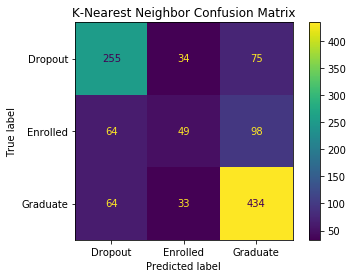

In [181]:
##create a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix
##plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ["Dropout", "Enrolled","Graduate"])

cm_display.plot()
plt.title("K-Nearest Neighbor Confusion Matrix")
plt.show()

### Decision Tree

In [182]:
##load packages
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [184]:
#target data
target = modeldata['Target']
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 2, 0, ..., 0, 2, 2])

In [185]:
#create feature and target 
X = modeldata.drop("Target", 1)       # feature matrix
Y = modeldata['Target']  #target column
#final cleaning: replace all infinite values with nan then drop all nan values
X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [186]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test

In [187]:
# Defining the decision tree algorithm
from sklearn import tree
...
decisiontree=DecisionTreeClassifier(max_depth=2, random_state=42)
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [188]:
# Predicting the values of test data
y_pred = decisiontree.predict(X_test)

print('Decision Tree Model accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Decision Tree Model accuracy: 0.7080


In [189]:
#other performance metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Dropout       0.80      0.61      0.69       360
    Enrolled       0.40      0.40      0.40       195
    Graduate       0.77      0.88      0.82       551

    accuracy                           0.71      1106
   macro avg       0.65      0.63      0.64      1106
weighted avg       0.71      0.71      0.70      1106



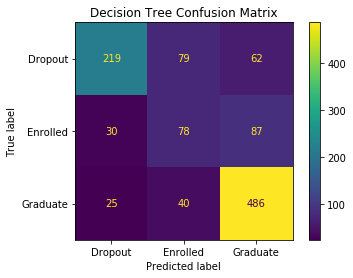

In [190]:
##create a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix
##plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ["Dropout", "Enrolled","Graduate"])

cm_display.plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()